# Business Problem and Objective

XY is a fashion retail company facing challenges in understanding customer shopping patterns and optimizing marketing strategies to increase revenue and customer retention. Currently, marketing strategies are carried out generally without clear segmentation.

To overcome this problem, companies need to understand customer shopping patterns and group them into several segments based on purchasing behavior. That way, companies can target more effective marketing strategies.


Objective:

The purpose of this analysis is to group customers based on their shopping behavior using the Customer Segmentation, Customer Segmentation: Demographic and Customer Segmentation: Behavioral approaches with the aim that companies can understand customer shopping patterns accurately.

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


# Data Understanding

In [ ]:
# Load dataset
data_path = '/content/drive/MyDrive/Final Project DA/shopping_trends.csv'

df = pd.read_csv(data_path)

df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
# check info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [ ]:
# Check describe dataset
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [ ]:
# Check Unique
df.nunique()

,0
Customer ID,3900
Age,53
Gender,2
Item Purchased,25
Category,4
Purchase Amount (USD),81
Location,50
Size,4
Color,25
Season,4


# Data Cleaning

In [ ]:
# Check missing value
df.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


The following dataset does not contain missing values

In [ ]:
# Check duplicated
df.duplicated().sum()

np.int64(0)

The following dataset does not contain duplicate data

# Data Manipulation

In [ ]:
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

## Average purchase per category

In [ ]:
category_spending = df.groupby('Category')['Purchase Amount (USD)'].mean().reset_index().sort_values(by='Purchase Amount (USD)', ascending=False)
print(category_spending)

      Category  Purchase Amount (USD)
2     Footwear              60.255426
1     Clothing              60.025331
0  Accessories              59.838710
3    Outerwear              57.172840


Footwear is the category with the highest average sales of 60.25 USD, followed by Clothing (60.02 USD), Accessories (59.83 USD) and Outwear (57.17 USD).

##  Average Customer Spending by Season

In [ ]:
season_spending = df.groupby('Season')['Purchase Amount (USD)'].mean().reset_index().sort_values(by='Purchase Amount (USD)', ascending=False)
print(season_spending)

   Season  Purchase Amount (USD)
0    Fall              61.556923
3  Winter              60.357364
1  Spring              58.737738
2  Summer              58.405236


The highest average sales occurred in Fall (61.55 USD), then Winter (60.35 USD), Spring (58.73 USD) and Summer (58.40 USD).

## Average Product Rating By Category

In [ ]:
category_rating = df.groupby('Category')['Review Rating'].mean().reset_index().sort_values(by='Review Rating', ascending=False)
print(category_rating)

      Category  Review Rating
2     Footwear       3.790651
0  Accessories       3.768629
3    Outerwear       3.746914
1     Clothing       3.723143


The average review rating is relatively similar across all categories, at around 3.7.

## Total Purchases per Location (Geographic)

In [ ]:
location_spending = df.groupby('Location')['Purchase Amount (USD)'].sum().reset_index().sort_values(by='Purchase Amount (USD)', ascending=False)
print(location_spending)

          Location  Purchase Amount (USD)
25         Montana                   5784
12        Illinois                   5617
4       California                   5605
11           Idaho                   5587
27          Nevada                   5514
0          Alabama                   5261
31        New York                   5257
33    North Dakota                   5220
47   West Virginia                   5174
26        Nebraska                   5172
30      New Mexico                   5014
22       Minnesota                   4977
37    Pennsylvania                   4926
23     Mississippi                   4883
1           Alaska                   4867
44         Vermont                   4860
17       Louisiana                   4848
45        Virginia                   4842
3         Arkansas                   4828
19        Maryland                   4795
41       Tennessee                   4772
7         Delaware                   4758
32  North Carolina                

The highest sales occurred in Montana while the lowest sales occurred in Kansas.

## Comparison of Purchases by Gender

In [ ]:
gender_spending = df.groupby('Gender')['Purchase Amount (USD)'].sum().reset_index()
gender_spending['Percentage'] = (gender_spending['Purchase Amount (USD)'] / gender_spending['Purchase Amount (USD)'].sum()) * 100
print(gender_spending)

   Gender  Purchase Amount (USD)  Percentage
0  Female                  75191   32.259601
1    Male                 157890   67.740399


The customers who make the most purchases are men (67.7%). While women are (32.3%).

# EDA

## Distribution of numeric column data

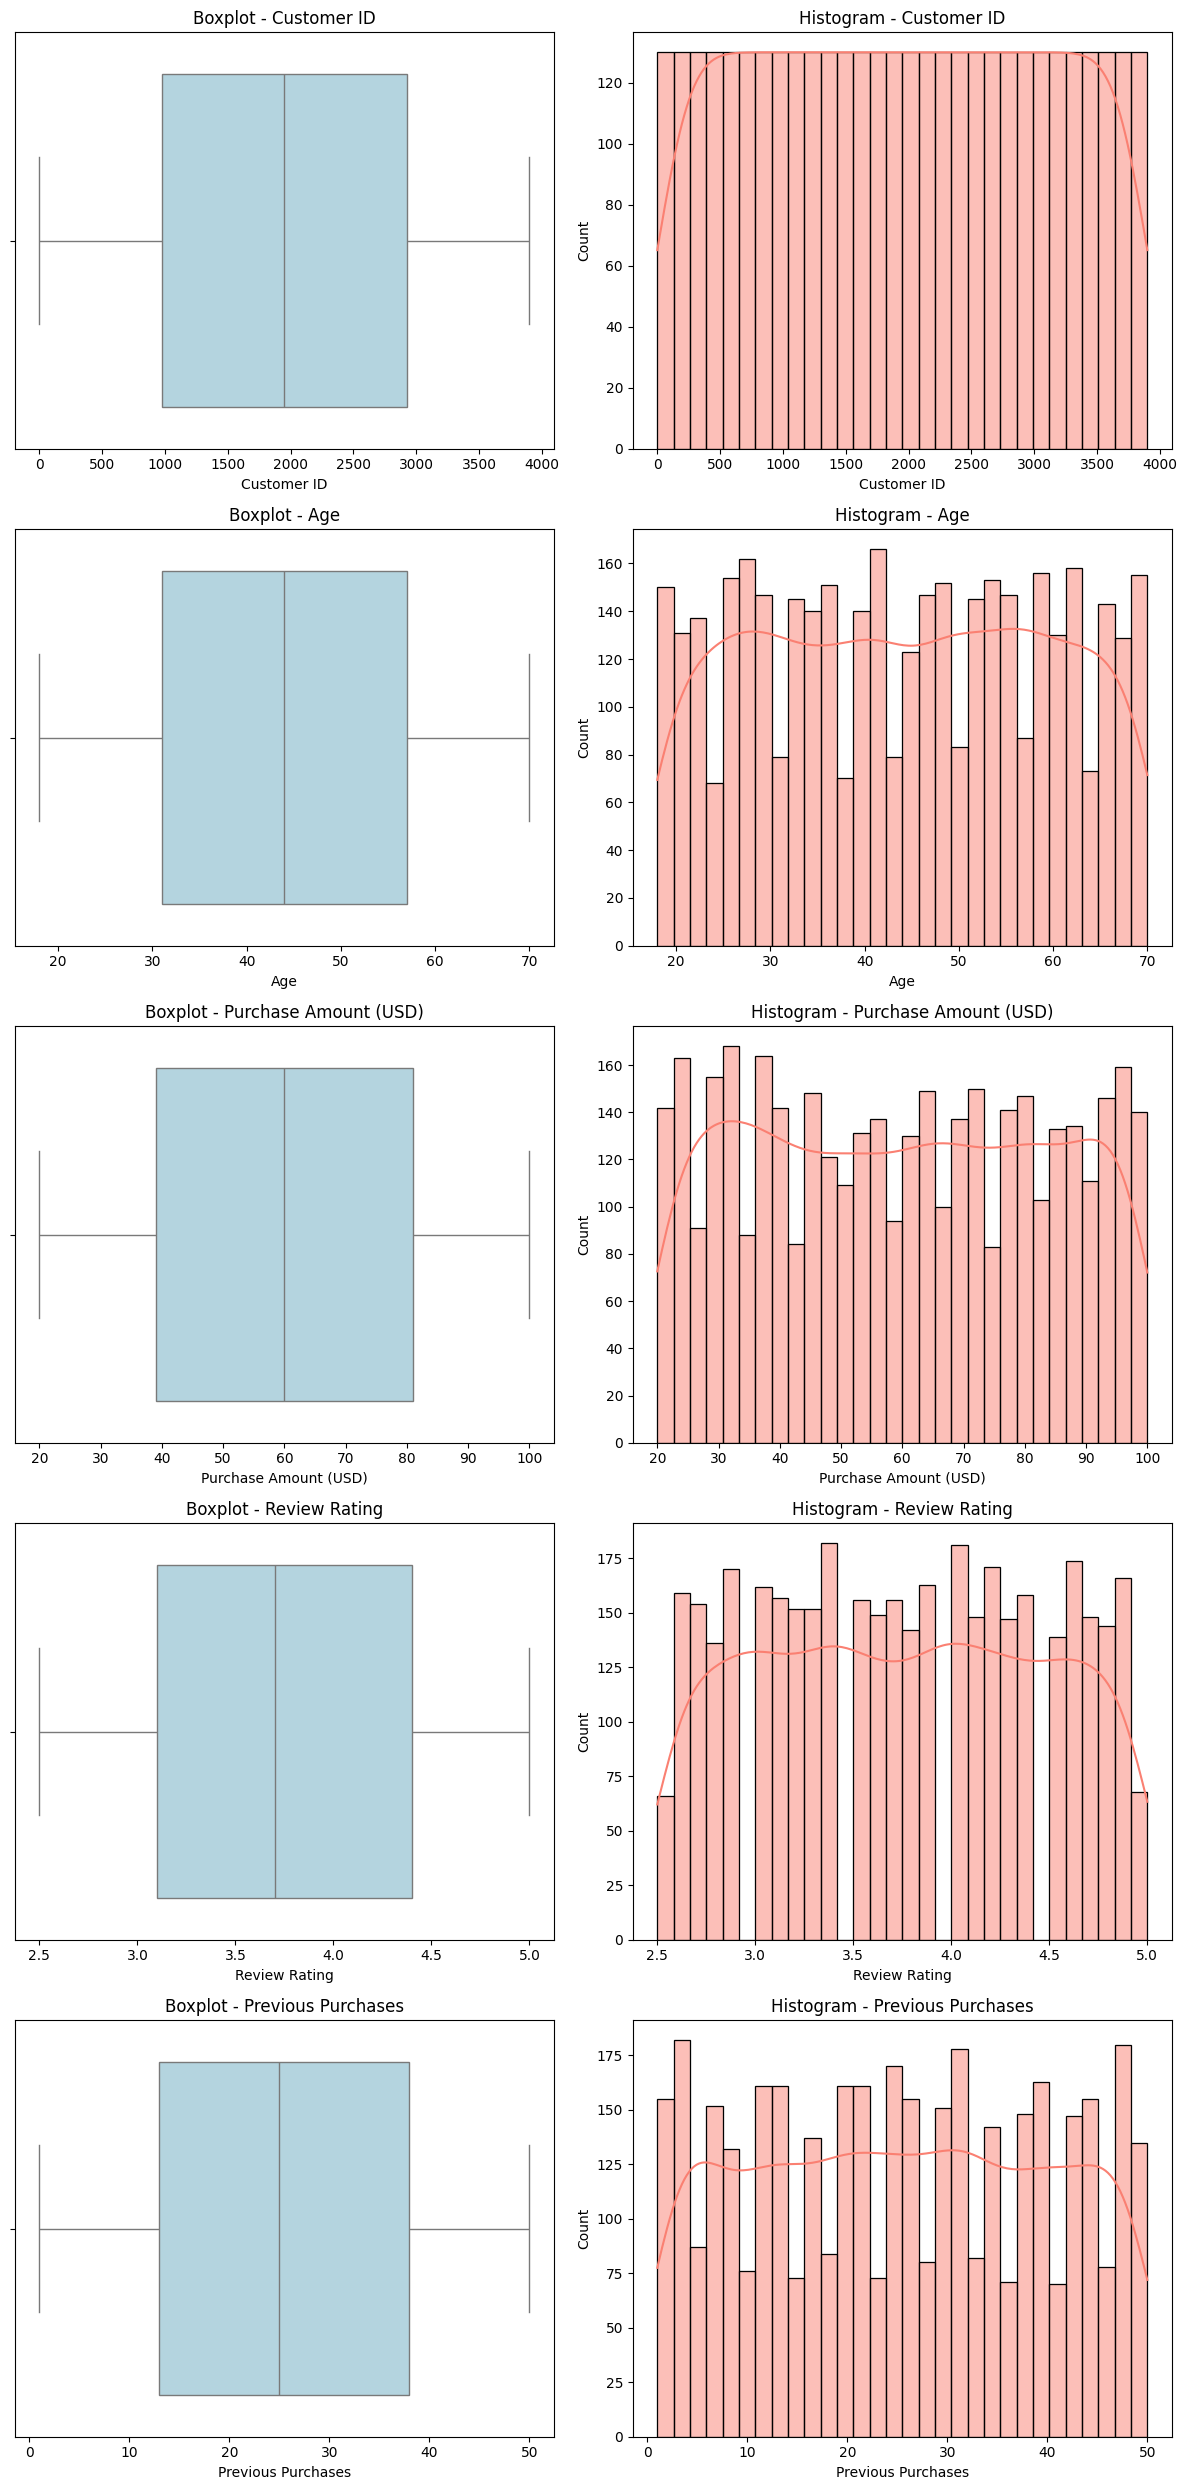

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, len(numerical_cols) * 5))

for i, col in enumerate(numerical_cols):
    # Boxplot
    plt.subplot(len(numerical_cols), 2, 2*i+1)
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f"Boxplot - {col}")

    # Histogram
    plt.subplot(len(numerical_cols), 2, 2*i+2)
    sns.histplot(df[col], bins=30, kde=True, color='salmon')
    plt.title(f"Histogram - {col}")

plt.tight_layout()
plt.show()

In [ ]:
# Check skewness kolom numerik
skewness_values = df[numerical_cols].skew()

print("Skewness on numerical columns:")
print(skewness_values)

Skewness on numerical columns:
Customer ID              0.000000
Age                     -0.006380
Purchase Amount (USD)    0.012702
Review Rating            0.004525
Previous Purchases       0.003121
dtype: float64


Customer ID (0.000000) -> Meaningless because it is only an identifier (not a numeric variable being analyzed).<br>

Age (-0.006380) -> Almost symmetrical, slightly skewed to the left but very small, so it can be considered a normal distribution.<br>

Purchase Amount (USD) (0.012702) -> Almost no skewness, indicating a nearly normal distribution.<br>

Review Rating (0.004525) -> Very small skewness, normal distribution.<br>

Previous Purchases (0.003121) -> Almost symmetrical, normal distribution.<br>

## Check the correlation of numeric columns

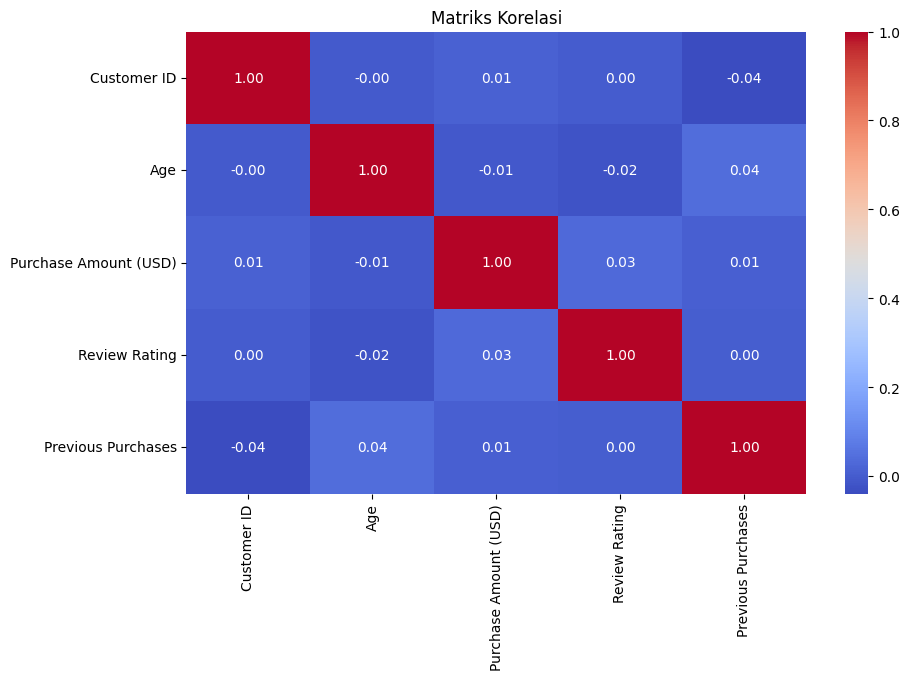

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi')
plt.show()

The correlation value of the above columns is around -0.04 to 0.04 which means that the following columns do not have a significant linear relationship between the numeric variables in the dataset. These features are indicated as not influencing each other directly.

## Comparison of Purchases by Gender

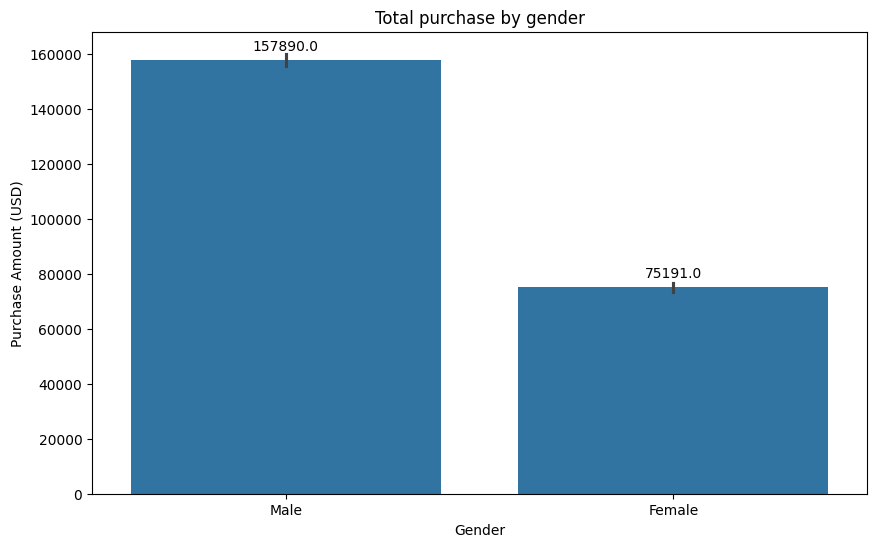

In [ ]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(x=df['Gender'], y=df['Purchase Amount (USD)'], estimator=sum)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0,5),
                textcoords='offset points')

plt.title('Total purchase by gender')
plt.show()

The largest total purchases were made by men (157,890 USD) while women (75,191 USD)

## Purchase Trends by Season

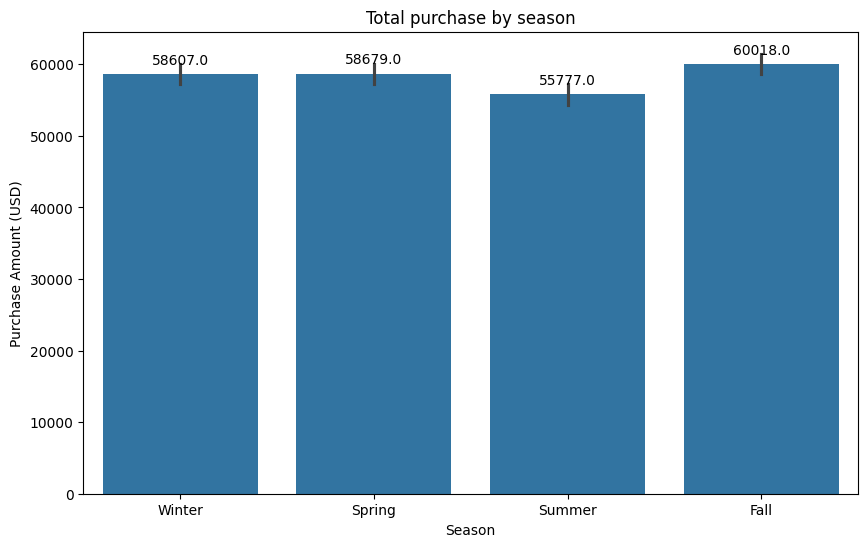

In [ ]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(x=df['Season'], y=df['Purchase Amount (USD)'], estimator=sum)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0,5),
                textcoords='offset points')

plt.title('Total purchase by season')
plt.show()

The highest total sales occurred in Fall (60,018 USD), Spring (58,679 USD), Winter (58,607 USD) and summer (55,777 USD).

##  Proportion of Subscribed and Non-Subscribed Customers

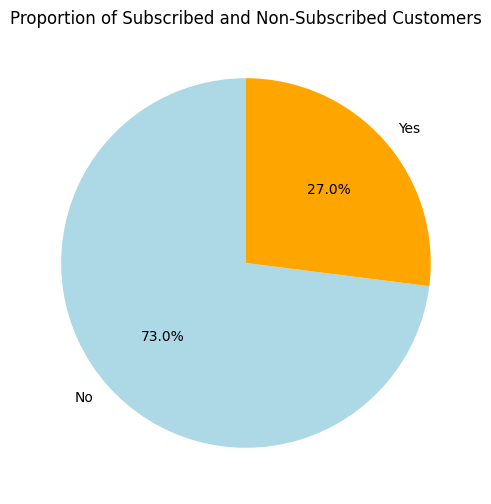

In [ ]:
plt.figure(figsize=(10, 6))
df['Subscription Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'orange'])
plt.title('Proportion of Subscribed and Non-Subscribed Customers')
plt.ylabel('')
plt.show()

Most of the customers who make purchases are not subscribers (73%). While those who subscribe are only (27%).

# Customer Segmentation

## Frequency and Monetary Score

In [ ]:
# Calculating Frequency (number of transactions)
df_rfm = df.groupby("Customer ID").agg({
    "Previous Purchases": "sum",
    "Purchase Amount (USD)": "sum"
}).reset_index()

# Menambahkan +1 ke kolom Frequency (jumlah pembelian + 1)
df_rfm["Previous Purchases"] = df_rfm["Previous Purchases"] + 1

# Rename columns
df_rfm.columns = ["Customer ID", "Frequency", "Monetary"]

df_rfm.head()

,Customer ID,Frequency,Monetary
0,1,15,53
1,2,3,64
2,3,24,73
3,4,50,90
4,5,32,49


In [ ]:
# Function to calculate quantile scores
def rfm_score(x, quantiles):
    if x <= quantiles[0.25]:
        return 1
    elif x <= quantiles[0.50]:
        return 2
    elif x <= quantiles[0.75]:
        return 3
    else:
        return 4

# Calculating quantiles
quantiles = df_rfm.quantile(q=[0.25, 0.50, 0.75])

# Determining F and M scores
df_rfm["F_Score"] = df_rfm["Frequency"].apply(lambda x: rfm_score(x, quantiles["Frequency"]))
df_rfm["M_Score"] = df_rfm["Monetary"].apply(lambda x: rfm_score(x, quantiles["Monetary"]))

df_rfm.head()

,Customer ID,Frequency,Monetary,F_Score,M_Score
0,1,15,53,2,2
1,2,3,64,1,3
2,3,24,73,2,3
3,4,50,90,4,4
4,5,32,49,3,2


In [ ]:
# Determining customer segments based on F and M
def segment_customer(row):
    if row["F_Score"] >= 3 and row["M_Score"] >= 3:
        return "Loyal Customers"
    elif row["F_Score"] >= 3 and row["M_Score"] < 3:
        return "Potential Customers"
    elif row["F_Score"] < 3 and row["M_Score"] >= 3:
        return "High Value One-Time Buyers"
    elif row["F_Score"] < 3 and row["M_Score"] < 3:
        return "Lost Customers"
    else:
        return "Unkwnon"

df_rfm["Customer Segment"] = df_rfm.apply(segment_customer, axis=1)

df_rfm["Customer Segment"].value_counts().reset_index()

,Customer Segment,count
0,Lost Customers,1007
1,Potential Customers,979
2,High Value One-Time Buyers,958
3,Loyal Customers,956


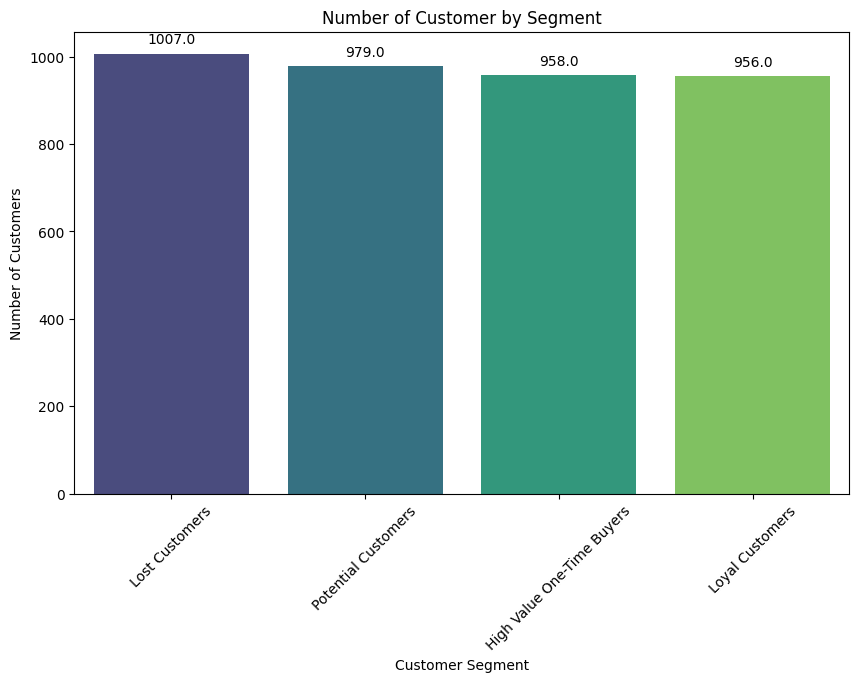

In [ ]:
segment_counts = df_rfm["Customer Segment"].value_counts()

plt.figure(figsize=(10, 6))
ax=sns.barplot(x=segment_counts.index, y=segment_counts.values, palette="viridis")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0,5),
                textcoords='offset points')

plt.xlabel("Customer Segment")
plt.ylabel("Number of Customers")
plt.title("Number of Customer by Segment")
plt.xticks(rotation=45)
plt.show()

* There more customers on segmentation Lost Customers than on other segmentations.
* Customers on segmentation Loyal Customers are the least.
* Segmentation  Potential Customers is the second the most behind Lost Customers.
* There are more customers on High Value One-Time Buyers than Loyal Customers.

In [ ]:
# Merge df_rfm to df on "Customer ID"
df = df.merge(df_rfm[["Customer ID", "Frequency", "Monetary", "F_Score", "M_Score", "Customer Segment"]],
              on="Customer ID",
              how="left")

df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Frequency,Monetary,F_Score,M_Score,Customer Segment
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Yes,Yes,14,Venmo,Fortnightly,15,53,2,2,Lost Customers
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Yes,Yes,2,Cash,Fortnightly,3,64,1,3,High Value One-Time Buyers
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Yes,Yes,23,Credit Card,Weekly,24,73,2,3,High Value One-Time Buyers
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Yes,Yes,49,PayPal,Weekly,50,90,4,4,Loyal Customers
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Yes,Yes,31,PayPal,Annually,32,49,3,2,Potential Customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,...,No,No,32,Venmo,Weekly,33,28,3,1,Potential Customers
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,...,No,No,41,Bank Transfer,Bi-Weekly,42,49,4,2,Potential Customers
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,...,No,No,24,Venmo,Quarterly,25,33,2,1,Lost Customers
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,...,No,No,24,Venmo,Weekly,25,77,2,3,High Value One-Time Buyers


## Customer Segmentation: Demographic

In [ ]:
# Column for age group
bins = [18, 30, 50, df['Age'].max()+1]
labels = ['Young (18-29)', 'Adult (30-49)', 'Elders (50+)']

df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [ ]:
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Frequency,Monetary,F_Score,M_Score,Customer Segment,Age Group
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Yes,14,Venmo,Fortnightly,15,53,2,2,Lost Customers,Elders (50+)
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Yes,2,Cash,Fortnightly,3,64,1,3,High Value One-Time Buyers,Young (18-29)
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Yes,23,Credit Card,Weekly,24,73,2,3,High Value One-Time Buyers,Elders (50+)
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Yes,49,PayPal,Weekly,50,90,4,4,Loyal Customers,Young (18-29)
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Yes,31,PayPal,Annually,32,49,3,2,Potential Customers,Adult (30-49)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,...,No,32,Venmo,Weekly,33,28,3,1,Potential Customers,Adult (30-49)
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,...,No,41,Bank Transfer,Bi-Weekly,42,49,4,2,Potential Customers,Elders (50+)
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,...,No,24,Venmo,Quarterly,25,33,2,1,Lost Customers,Adult (30-49)
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,...,No,24,Venmo,Weekly,25,77,2,3,High Value One-Time Buyers,Adult (30-49)


### Age and Gender

In [ ]:
age_insight = df.groupby(["Age Group", "Gender"])["Purchase Amount (USD)"].sum().reset_index().sort_values(by="Purchase Amount (USD)", ascending=False)
print(age_insight)

       Age Group  Gender  Purchase Amount (USD)
5   Elders (50+)    Male                  63743
3  Adult (30-49)    Male                  58243
1  Young (18-29)    Male                  35904
4   Elders (50+)  Female                  29667
2  Adult (30-49)  Female                  28523
0  Young (18-29)  Female                  17001


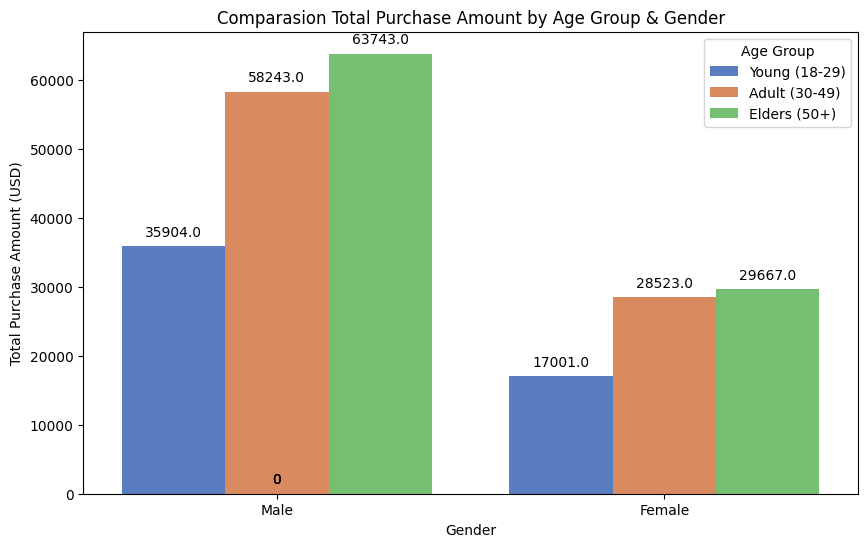

In [ ]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(data=age_insight, x="Gender", y="Purchase Amount (USD)", hue="Age Group", palette="muted")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0,5),
                textcoords='offset points')

plt.xlabel("Gender")
plt.ylabel("Total Purchase Amount (USD)")
plt.title("Comparasion Total Purchase Amount by Age Group & Gender")
plt.legend(title="Age Group")
plt.show()

* Man purchase more than woman. Overall man purchase almost twice woman
* Elders (50+) man purchase the most.
* Young (18-29) woman purchase the least.
* The older the age group, the more the spent on products.

In [ ]:
# Grup berdasarkan Age Group, Gender, Category, dan Frequency of Purchases
demographic_behavioral = df.groupby(
    ['Age Group', 'Gender', 'Category', 'Frequency of Purchases']
)['Customer ID'].nunique().reset_index()

# Rename kolom
demographic_behavioral.rename(columns={'Customer ID': 'Number of Customers'}, inplace=True)

demographic_behavioral.head()

,Age Group,Gender,Category,Frequency of Purchases,Number of Customers
0,Young (18-29),Female,Accessories,Annually,8
1,Young (18-29),Female,Accessories,Bi-Weekly,17
2,Young (18-29),Female,Accessories,Every 3 Months,11
3,Young (18-29),Female,Accessories,Fortnightly,12
4,Young (18-29),Female,Accessories,Monthly,9


#### Age group by Category

In [ ]:
age_cat = demographic_behavioral.groupby(["Category", "Age Group"])["Number of Customers"].sum().reset_index()
age_cat

,Category,Age Group,Number of Customers
0,Accessories,Young (18-29),275
1,Accessories,Adult (30-49),472
2,Accessories,Elders (50+),493
3,Clothing,Young (18-29),404
4,Clothing,Adult (30-49),648
5,Clothing,Elders (50+),685
6,Footwear,Young (18-29),127
7,Footwear,Adult (30-49),220
8,Footwear,Elders (50+),252
9,Outerwear,Young (18-29),72


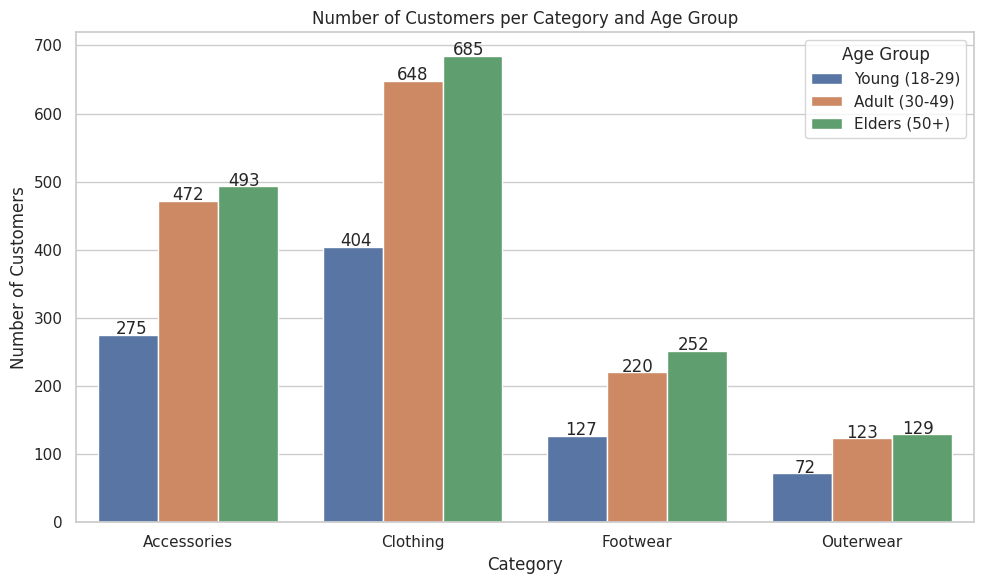

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=age_cat, x="Category", y="Number of Customers", hue="Age Group")

for i in range(len(age_cat)):
    row = age_cat.iloc[i]
    plt.text(
        x=i//3 + (i % 3)*0.25 - 0.25,
        y=row["Number of Customers"] + 1,
        s=int(row["Number of Customers"]),
        ha="center"
    )

plt.title("Number of Customers per Category and Age Group")
plt.ylabel("Number of Customers")
plt.xlabel("Category")
plt.legend(title="Age Group")
plt.tight_layout()
plt.show()

* The most customer in every category is age group elders.
* The least customer in every category is age group young.
* The most customer in every group in clothing.
* The least customer in every group in outerwear.

#### Gender by Category

In [ ]:
gender_cat = demographic_behavioral.groupby(["Category", "Gender"])["Number of Customers"].sum().reset_index()
gender_cat

,Category,Gender,Number of Customers
0,Accessories,Female,392
1,Accessories,Male,848
2,Clothing,Female,556
3,Clothing,Male,1181
4,Footwear,Female,199
5,Footwear,Male,400
6,Outerwear,Female,101
7,Outerwear,Male,223


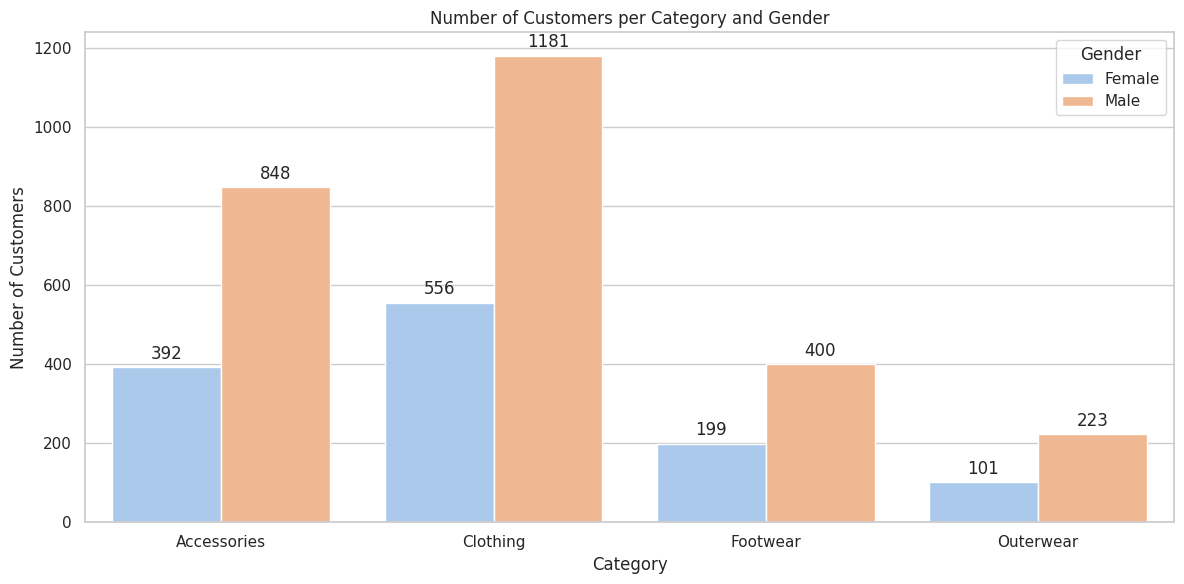

In [ ]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

barplot = sns.barplot(
    data=gender_cat,
    x="Category",
    y="Number of Customers",
    hue="Gender",
    palette="pastel",
    ci=None
)

for container in barplot.containers:
    barplot.bar_label(container, fmt="%.0f", label_type="edge", padding=3)

plt.title("Number of Customers per Category and Gender")
plt.xlabel("Category")
plt.ylabel("Number of Customers")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

* The most customer in every category is male.
* The least customer in every category is female.
* The most customer in every group in clothing.
* The least customer in every group in outerwear.

#### Age group by Frequency of Purchases

In [ ]:
age_freq= demographic_behavioral.groupby(["Frequency of Purchases", "Age Group"])["Number of Customers"].sum().reset_index()
age_freq

,Frequency of Purchases,Age Group,Number of Customers
0,Annually,Young (18-29),121
1,Annually,Adult (30-49),215
2,Annually,Elders (50+),236
3,Bi-Weekly,Young (18-29),147
4,Bi-Weekly,Adult (30-49),190
5,Bi-Weekly,Elders (50+),210
6,Every 3 Months,Young (18-29),132
7,Every 3 Months,Adult (30-49),232
8,Every 3 Months,Elders (50+),220
9,Fortnightly,Young (18-29),121


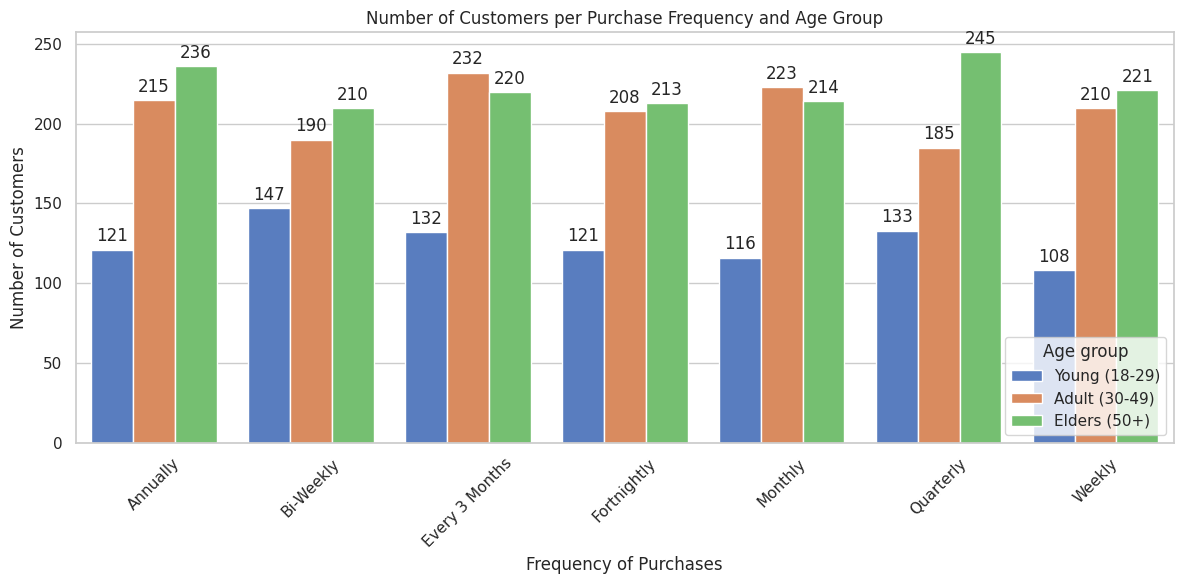

In [ ]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

barplot = sns.barplot(
    data=age_freq,
    x="Frequency of Purchases",
    y="Number of Customers",
    hue="Age Group",
    palette="muted",
    ci=None
)

for container in barplot.containers:
    barplot.bar_label(container, fmt="%.0f", label_type="edge", padding=3)

plt.title("Number of Customers per Purchase Frequency and Age Group")
plt.xlabel("Frequency of Purchases")
plt.ylabel("Number of Customers")
plt.legend(title="Age group")
plt.xticks(rotation=45)
plt.legend(title="Age group", loc="lower right", bbox_to_anchor=(1, 0))
plt.tight_layout()
plt.show()

* Customer in group elders tends to purchase goods in quarterly.
* Customer in group young tends to purchase goods in bi-weekly.
* Customer in group adult tends to purchase goods in every 3 months.

#### Gender by Frequency of Purchases

In [ ]:
gender_freq= demographic_behavioral.groupby(["Frequency of Purchases", "Gender"])["Number of Customers"].sum().reset_index()
gender_freq

,Frequency of Purchases,Gender,Number of Customers
0,Annually,Female,185
1,Annually,Male,387
2,Bi-Weekly,Female,188
3,Bi-Weekly,Male,359
4,Every 3 Months,Female,186
5,Every 3 Months,Male,398
6,Fortnightly,Female,163
7,Fortnightly,Male,379
8,Monthly,Female,185
9,Monthly,Male,368


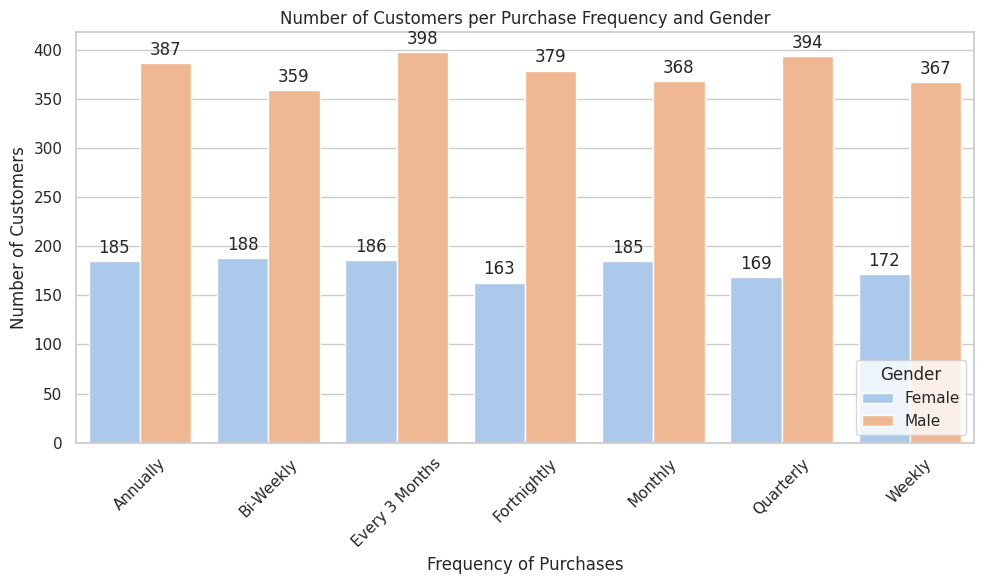

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

barplot = sns.barplot(
    data=gender_freq,
    x="Frequency of Purchases",
    y="Number of Customers",
    hue="Gender",
    palette="pastel",
    ci=None
)

for container in barplot.containers:
    barplot.bar_label(container, fmt="%.0f", label_type="edge", padding=3)

plt.title("Number of Customers per Purchase Frequency and Gender")
plt.xlabel("Frequency of Purchases")
plt.ylabel("Number of Customers")
plt.legend(title="Gender")
plt.xticks(rotation=45)
plt.legend(title="Gender", loc="lower right", bbox_to_anchor=(1, 0))
plt.tight_layout()
plt.show()

* Male customers tends to purchase goods in every 3 months.
* Female customers tends to purchase goods in bi-weekly.

## Customer Segmentation: Behavioral

In [ ]:
behavioral_segmentation = df.groupby(['Category', 'Payment Method', 'Frequency of Purchases', 'Season'])['Customer ID'].nunique().reset_index()
behavioral_segmentation

,Category,Payment Method,Frequency of Purchases,Season,Customer ID
0,Accessories,Bank Transfer,Annually,Fall,9
1,Accessories,Bank Transfer,Annually,Spring,4
2,Accessories,Bank Transfer,Annually,Summer,8
3,Accessories,Bank Transfer,Annually,Winter,5
4,Accessories,Bank Transfer,Bi-Weekly,Fall,6
...,...,...,...,...,...
643,Outerwear,Venmo,Quarterly,Summer,2
644,Outerwear,Venmo,Quarterly,Winter,2
645,Outerwear,Venmo,Weekly,Fall,1
646,Outerwear,Venmo,Weekly,Spring,3


### Category

In [ ]:
category_insight = behavioral_segmentation.groupby("Category")["Customer ID"].sum().reset_index().sort_values(by="Customer ID", ascending=False)
print(category_insight)

      Category  Customer ID
1     Clothing         1737
0  Accessories         1240
2     Footwear          599
3    Outerwear          324


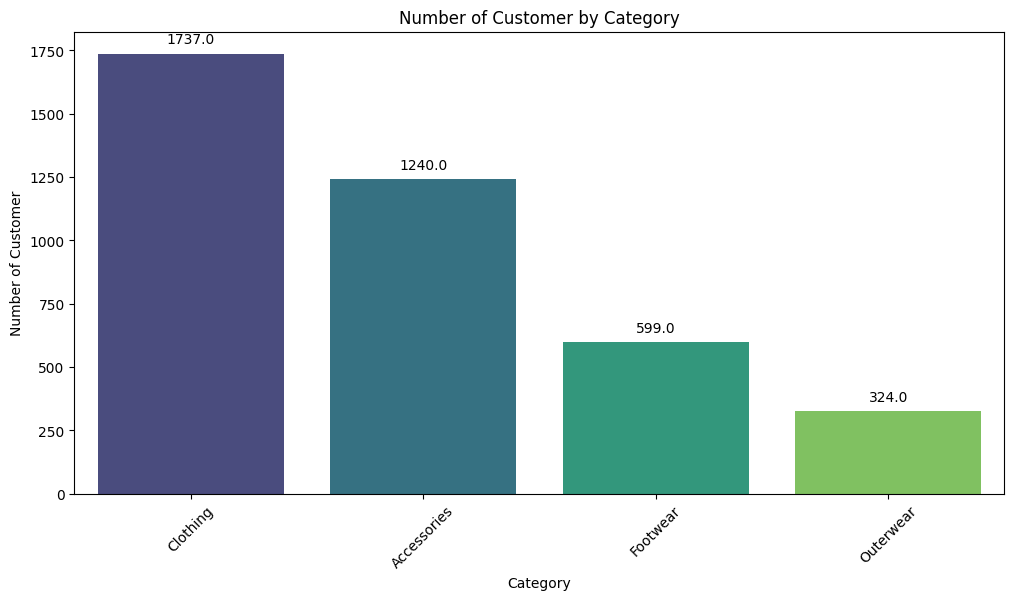

In [ ]:
plt.figure(figsize=(12, 6))
ax=sns.barplot(data=category_insight, x="Category", y="Customer ID", palette="viridis")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0,5),
                textcoords='offset points')

plt.xlabel("Category")
plt.ylabel("Number of Customer")
plt.title("Number of Customer by Category")
plt.xticks(rotation=45)
plt.show()

* Customer purchases the most on clothing.
* Customer purchases the least on outerwear.
* The number of customers who purchase on clothing is 5x more than purchase on outwear.
* After clothing, accessories become the second most purchased by customers, followed by footwear and outerwear at the least.

### Payment

In [ ]:
payment_insight = behavioral_segmentation.groupby("Payment Method")["Customer ID"].sum().reset_index().sort_values(by="Customer ID", ascending=False)
print(payment_insight)

  Payment Method  Customer ID
2    Credit Card          696
5          Venmo          653
1           Cash          648
4         PayPal          638
3     Debit Card          633
0  Bank Transfer          632


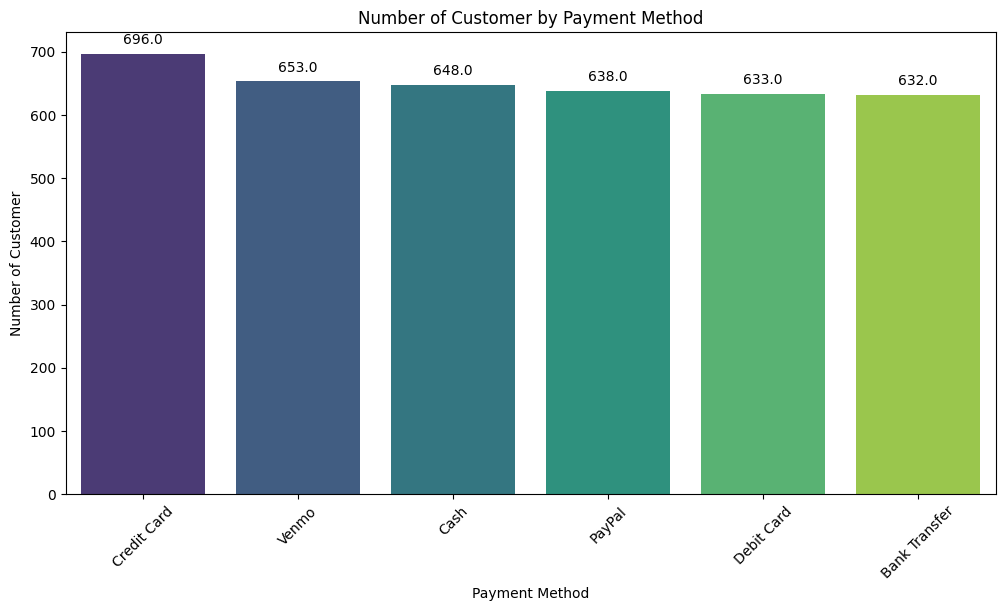

In [ ]:
plt.figure(figsize=(12, 6))
ax=sns.barplot(data=payment_insight, x="Payment Method", y="Customer ID", palette="viridis")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0,5),
                textcoords='offset points')

plt.xlabel("Payment Method")
plt.ylabel("Number of Customer")
plt.title("Number of Customer by Payment Method")
plt.xticks(rotation=45)
plt.show()

* Majority of customers use credit card.
* The least payment methods used is bank transfer.
* After credit card, customers use Venmo as the the payment methods, then cash, PayPal, debit card and the last bank transfer.
* The difference number of customers who use credit card and bank transfer is not huge. The difference is 64 customers

### Frequency of purchases

In [ ]:
frequency_insight = behavioral_segmentation.groupby("Frequency of Purchases")["Customer ID"].sum().reset_index().sort_values(by="Customer ID", ascending=False)
print(frequency_insight)

  Frequency of Purchases  Customer ID
2         Every 3 Months          584
0               Annually          572
5              Quarterly          563
4                Monthly          553
1              Bi-Weekly          547
3            Fortnightly          542
6                 Weekly          539


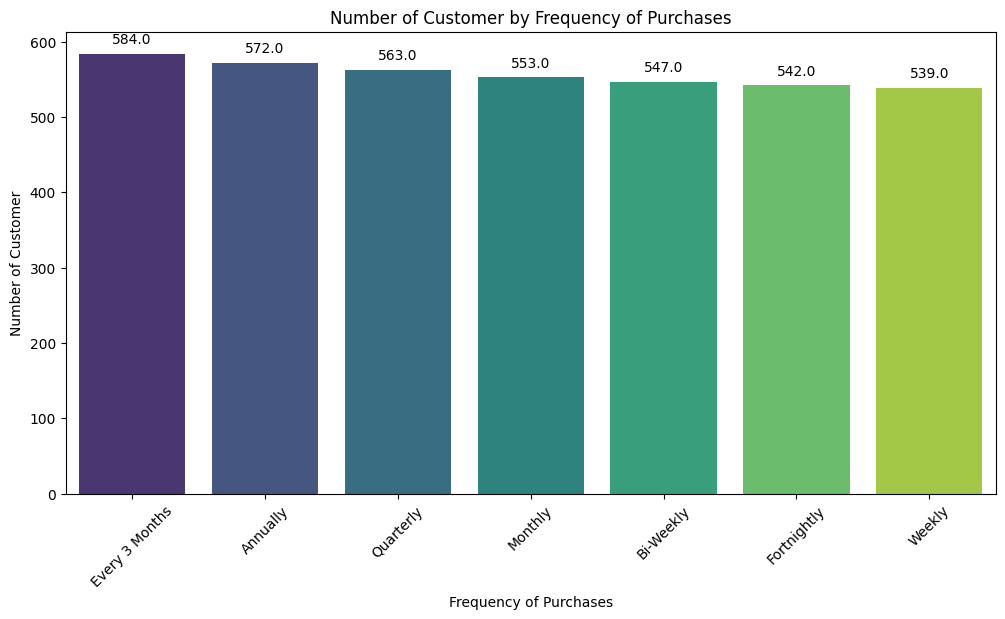

In [ ]:
plt.figure(figsize=(12, 6))
ax=sns.barplot(data=frequency_insight, x="Frequency of Purchases", y="Customer ID", palette="viridis")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0,5),
                textcoords='offset points')

plt.xlabel("Frequency of Purchases")
plt.ylabel("Number of Customer")
plt.title("Number of Customer by Frequency of Purchases")
plt.xticks(rotation=45)
plt.show()

* Customers purchase items the most every 3 months.
* Customers purchase items the least on weekly.
* Customers prefer some time to make a new order after ordered the previous one.
* In order from the most to the least: every 3 months, annually, quarterly, monthly, bi-weekly, fortnightly and weekly.

### Season

In [ ]:
season_insight = behavioral_segmentation.groupby("Season")["Customer ID"].sum().reset_index().sort_values(by="Customer ID", ascending=False)
print(season_insight)

   Season  Customer ID
1  Spring          999
0    Fall          975
3  Winter          971
2  Summer          955


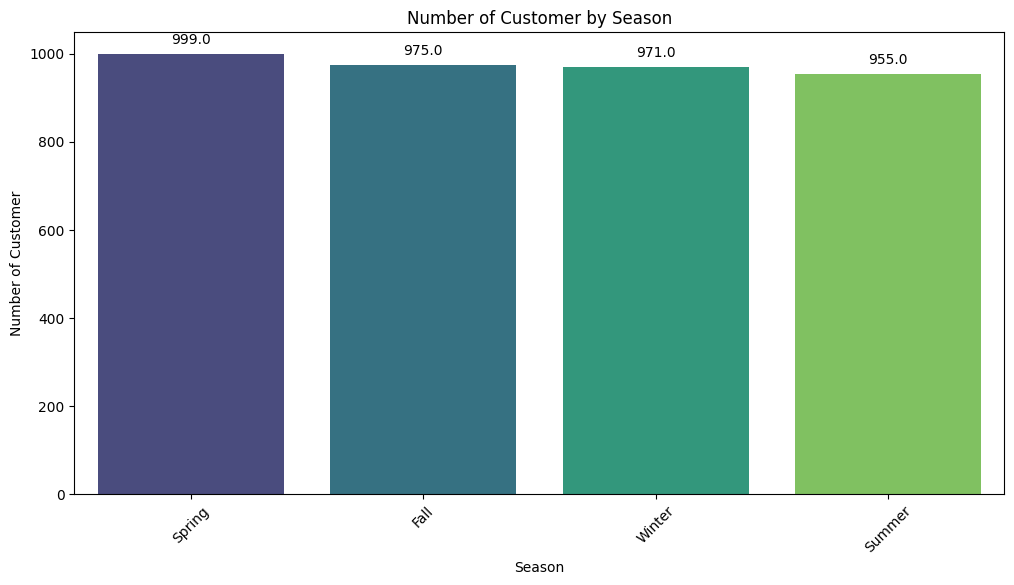

In [ ]:
plt.figure(figsize=(12, 6))
ax=sns.barplot(data=season_insight, x="Season", y="Customer ID", palette="viridis")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0,5),
                textcoords='offset points')

plt.xlabel("Season")
plt.ylabel("Number of Customer")
plt.title("Number of Customer by Season")
plt.xticks(rotation=45)
plt.show()

* Majority of customers purchase items on Spring.
* Customers purchase items the least on Summer.
* In order from the most to the least: Spring, Fall, Winter and Summer.

### Subscription Based

In [ ]:
subscription_segmentation = df.groupby('Subscription Status').agg({
    'Customer ID': 'nunique',
    'Purchase Amount (USD)': 'sum'
}).reset_index()

subscription_segmentation

,Subscription Status,Customer ID,Purchase Amount (USD)
0,No,2847,170436
1,Yes,1053,62645


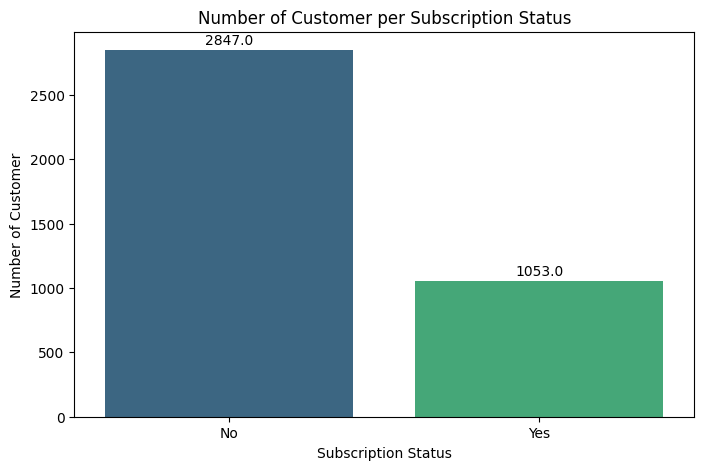

In [ ]:
plt.figure(figsize=(8, 5))
ax=sns.barplot(x="Subscription Status", y="Customer ID", data=subscription_segmentation, palette="viridis")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0,2),
                textcoords='offset points')

plt.title("Number of Customer per Subscription Status")
plt.xlabel("Subscription Status")
plt.ylabel("Number of Customer")
plt.show()

* Most of customers are not subscribers.
* Non-subscribers customers are twice as much as subscribers customers

## Dashboard

[Dashboard on Tableau](https://public.tableau.com/app/profile/muhammad.wahyu.ghifari/viz/ShoppingTrendsCustomerSegmentation/page1)

# Recommendation

1. Customer segmentation
* Provide exclusive promotion to attract customer back and reduce number customer on Lost Customers
* Offer special discounts to customers who make regular purchases to increase Loyal Customers.
* Encourage upselling and cross-selling to increase their transaction value to convert Potential Customers to Loyal Customers.
* Offer a discount or special offer for the second purchase for customer on High Value One-Time Buyers. <br><br>

2. Customer Segmentation: Demographic
* Offer product bundling or cashback programs to attract women to shop more often.
* Use testimonial-based marketing from women customers to increase trust.
* Maximize purchases from elders men (50+) such as creating premium product packages that suit their lifestyle.
* Use special discount strategies for students or young workers.
* Increase flexible payment options such as "Buy Now Pay Later" (BNPL) to attract young customer (18-29) to shop more often.<br><br>

3. Customer Segmentation: Behavioral
* Increase outerwear sales with bundling promotions, for example “Buy a Jacket, Get Free Gloves”.
* Use endorsement strategies from fashion influencers to attract more customer interest.
* Provide volume discounts for purchases of more than 2 products
* Provide exclusive promotions for credit card users, such as 0% installments.
*Give discounts or cashback for payments via Bank Transfer.
* Offer a discount for repeat purchases within 7 -  14 days to increase more frequent purchases.
* Use a subscription system for certain product categories.
* Run a campaign such as "Summer Sale" with attractive discounts.
* Use flash sale strategies to attract customers to shop during the summer.
* Provide exclusive benefits to subscribers, such as additional discounts or early access to products.
* Offer a 1-month free trial to make customers more interested in subscribing.

# Save dataset

In [ ]:
df.to_csv('projeck_da.csv', index=False)